# Family History and Clinical Profile in OCD

Problem Statement: "To what extent does a family history of OCD contribute to the manifestation and severity of OCD symptoms? Are there indications that genetic or environmental factors play a role?"

Goals: "To investigate the relationship between family history and the clinical profile of individuals with OCD."


## Import Libraries

In [1]:
import pandas as pd #manipulasi & analisis data tabular
import numpy as np #operasi numerik dan manipulasi array
import matplotlib.pyplot as plt #visualisasi data dasar seperti diagram batang, grafik lingkaran, dan diagram sebar.
import seaborn as sns # visualisasi data statistik yang lebih canggih dan informatif.
from scipy.stats import pearsonr, spearmanr # uji statistik, khususnya uji korelasi.

## Read Data & Data Understanding

In [2]:
df = pd.read_csv('ocd_patient_dataset.csv')
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,7/15/2016,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,4/28/2017,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2/2/2018,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,8/25/2014,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2/20/2022,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [3]:
print('Information:')
df.info()

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   in

In [4]:
print(df.apply(lambda col: col.unique())) #displays unique values for each coloumn

Patient ID                       [1018, 2406, 1188, 6200, 5824, 6946, 9861, 839...
Age                              [32, 69, 57, 27, 56, 38, 36, 72, 21, 73, 23, 6...
Gender                                                              [Female, Male]
Ethnicity                                    [African, Hispanic, Asian, Caucasian]
Marital Status                                         [Single, Divorced, Married]
Education Level                  [Some College, College Degree, High School, Gr...
OCD Diagnosis Date               [7/15/2016, 4/28/2017, 2/2/2018, 8/25/2014, 2/...
Duration of Symptoms (months)    [203, 180, 173, 126, 168, 46, 110, 197, 84, 47...
Previous Diagnoses                           [MDD, nan, PTSD, GAD, Panic Disorder]
Family History of OCD                                                    [No, Yes]
Obsession Type                   [Harm-related, Contamination, Symmetry, Hoardi...
Compulsion Type                   [Checking, Washing, Ordering, Praying, Counting]
Y-BO

In [5]:
df.isnull().sum() #no. of null values in each coloumn

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

In [6]:
#Checking for duplicates 
value=len(df[df.duplicated()])
print(value)

0


## Exploratory Data Analysis

### Demographic Analysis

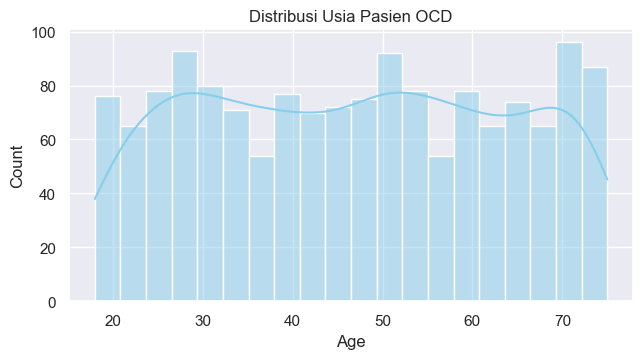

In [7]:
# Setel tema visual Seaborn (opsional)
sns.set_theme()

# Analisis demografi dengan Seaborn
plt.figure(figsize=(16, 12))

# 1. Distribusi Usia
plt.subplot(3, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Pasien OCD')
plt.show()

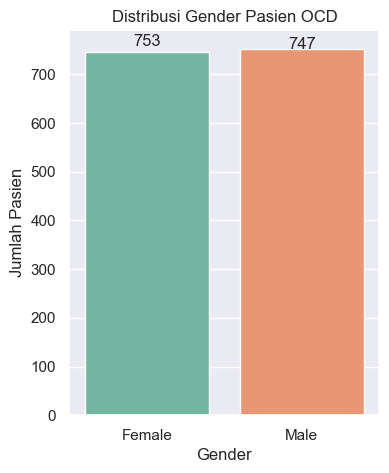

In [8]:
# Menghitung jumlah pasien OCD berdasarkan gender
gender_count = df['Gender'].value_counts()

# Visualisasi dengan Seaborn
plt.figure(figsize=(4, 5))
sns.countplot(x='Gender', data=df, palette='Set2', hue='Gender')
plt.title('Distribusi Gender Pasien OCD')
plt.xlabel('Gender')
plt.ylabel('Jumlah Pasien')

# Menambahkan label jumlah di atas batang
for index, value in enumerate(gender_count):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

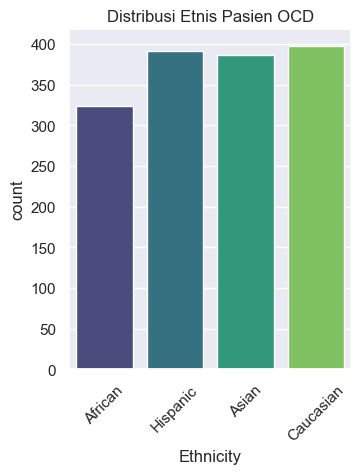

In [9]:
# 3. Distribusi Etnis
plt.figure(figsize=(8, 15))
plt.subplot(3, 2, 3)
sns.countplot(x='Ethnicity', data=df, palette='viridis', hue='Ethnicity')
plt.title('Distribusi Etnis Pasien OCD')
plt.xticks(rotation=45)
plt.show()

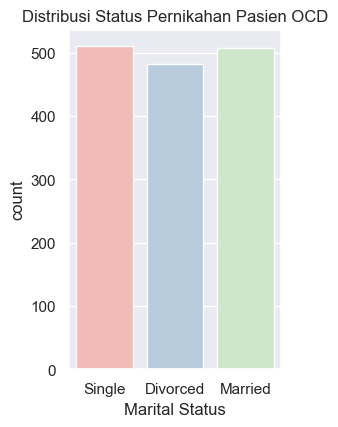

In [10]:
# 4. Distribusi Status Pernikahan
plt.figure(figsize=(6, 15))
plt.subplot(3, 2, 4)
sns.countplot(x='Marital Status', data=df, palette='Pastel1', hue='Marital Status')
plt.title('Distribusi Status Pernikahan Pasien OCD')
plt.show()

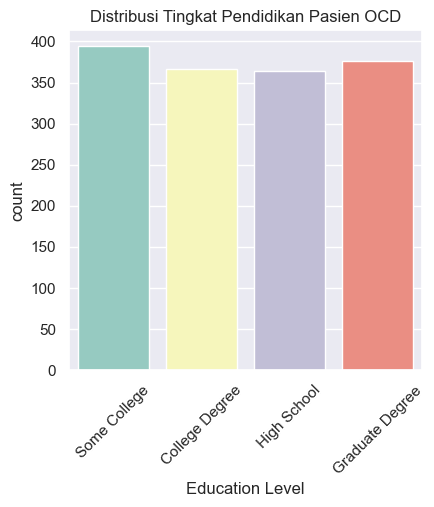

In [11]:
# 5. Distribusi Tingkat Pendidikan
plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 5)
sns.countplot(x='Education Level', data=df, palette='Set3', hue='Education Level')
plt.title('Distribusi Tingkat Pendidikan Pasien OCD')
plt.xticks(rotation=45)
plt.show()

### OCD Patients Based on the Presence or Absence of Family History with OCD

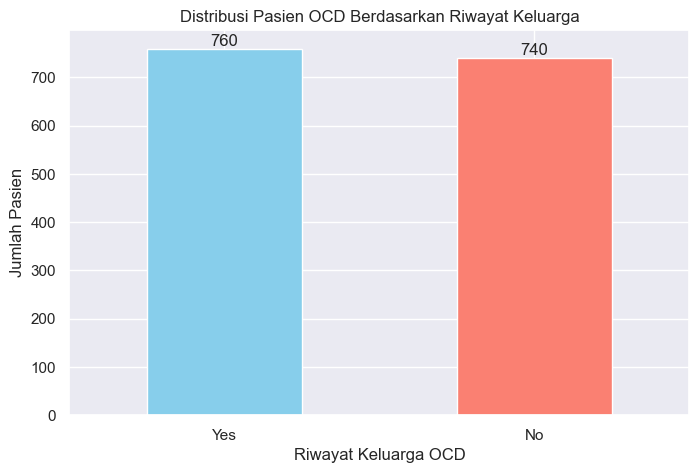

In [12]:
# Menghitung jumlah pasien dengan dan tanpa riwayat keluarga OCD
riwayat_keluarga_count = df['Family History of OCD'].value_counts()

# Visualisasi dengan diagram batang
plt.figure(figsize=(8, 5))
riwayat_keluarga_count.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Pasien OCD Berdasarkan Riwayat Keluarga')
plt.xlabel('Riwayat Keluarga OCD')
plt.ylabel('Jumlah Pasien')

# Menambahkan label di atas batang
for index, value in enumerate(riwayat_keluarga_count):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

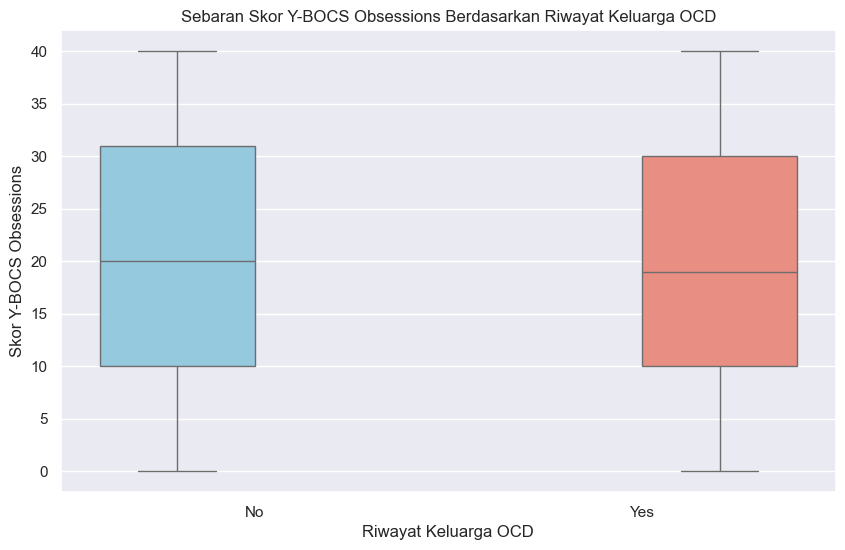

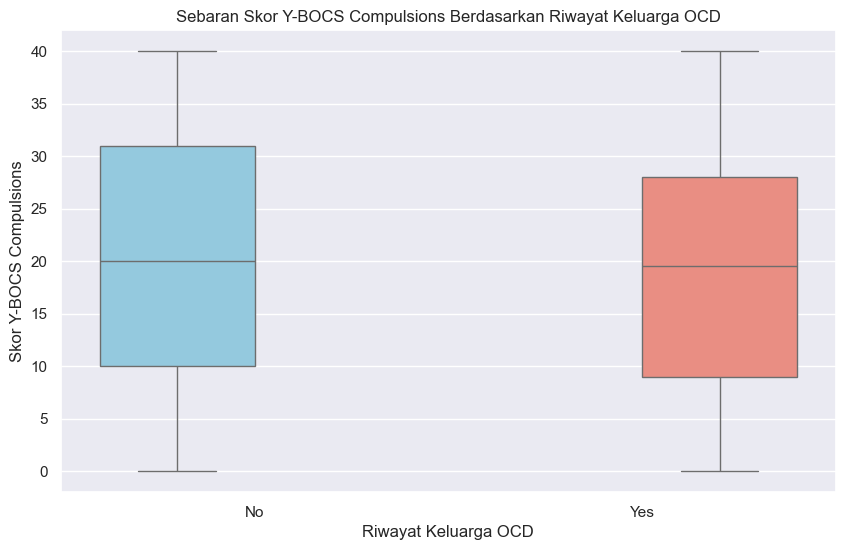

In [13]:
# Visualisasi dengan box plot untuk obsessions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family History of OCD', y='Y-BOCS Score (Obsessions)', data=df, hue='Family History of OCD', palette=['skyblue', 'salmon'], dodge=True)
plt.title('Sebaran Skor Y-BOCS Obsessions Berdasarkan Riwayat Keluarga OCD')
plt.xlabel('Riwayat Keluarga OCD')
plt.ylabel('Skor Y-BOCS Obsessions')
plt.show()

# Visualisasi dengan box plot untuk compulsions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family History of OCD', y='Y-BOCS Score (Compulsions)', data=df, hue='Family History of OCD', palette=['skyblue', 'salmon'], dodge=True)
plt.title('Sebaran Skor Y-BOCS Compulsions Berdasarkan Riwayat Keluarga OCD')
plt.xlabel('Riwayat Keluarga OCD')
plt.ylabel('Skor Y-BOCS Compulsions')
plt.show()

In [14]:
# Mengonversi kolom 'Family History of OCD' ke nilai numerik (contoh: 1 untuk 'Yes' dan 0 untuk 'No')
df['Family History of OCD'] = df['Family History of OCD'].map({'Yes': 1, 'No': 0})

# Memilih kolom yang akan diuji korelasinya
# Gantilah 'Family History of OCD' dan 'Y-BOCS Score (Obsessions)' sesuai dengan kolom yang relevan dalam dataset Anda
kolom_riwayat_keluarga = df['Family History of OCD']
kolom_keparahan_gejala = df['Y-BOCS Score (Obsessions)']

# Menghitung korelasi Pearson
korelasi_pearson, p_value_pearson = pearsonr(kolom_riwayat_keluarga, kolom_keparahan_gejala)

# Menghitung korelasi Spearman
korelasi_spearman, p_value_spearman = spearmanr(kolom_riwayat_keluarga, kolom_keparahan_gejala)

# Menampilkan hasil
print(f'Korelasi Pearson: {korelasi_pearson}, p-value: {p_value_pearson}')
print(f'Korelasi Spearman: {korelasi_spearman}, p-value: {p_value_spearman}')

Korelasi Pearson: -0.005017955162373444, p-value: 0.8460319873000408
Korelasi Spearman: -0.004822466983294984, p-value: 0.8519595849790486


# Analysis Results

## Distribution of Y-BOCS Obsessions and Compulsions Scores

Based on the box plot visualization for obsession and compulsion scores, there is no noticeable difference in the distribution of scores between patients with and without a family history of OCD.

## Number of Patients with and without a Family History of OCD

The number of patients in both groups is relatively balanced, providing a good representation for analysis.

## Correlation Test

The Pearson correlation result of approximately -0.005 and the Spearman correlation of around -0.005 indicate a very weak correlation between the 'Family History of OCD' and 'Y-BOCS Score (Obsessions)' variables. Both correlation values approaching zero signify that there is no significant linear or monotonic correlation between these variables.

The high p-value (greater than 0.05) suggests that the correlation results are not statistically significant. Therefore, based on this analysis, there is not enough evidence to support a significant relationship between a family history of OCD and the severity of obsession symptoms based on the Y-BOCS score.

This could be interpreted as, at least based on this measurement, a family history of OCD is not directly related to the severity of obsession symptoms in patients in this dataset. However, it's important to note that these are results from a specific dataset, and their interpretation should be considered in the clinical context and scientific wisdom. If there are additional factors that could potentially influence the results, they should be taken into account in further analysis.